# physionet2012 전처리 delta 추가 데이터 가져오기

In [ ]:
# colab설정

from google.colab import drive
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# import libraries
import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', None)

drive.mount('/content/drive')
path = '/content/drive/MyDrive/'
os.chdir(path)

file = 'train_done_preprocessing_scaling_delta_cols.csv'
file2 = 'valid_done_preprocessing_scaling_delta_cols.csv'
file3 = 'test_done_preprocessing_scaling_delta_cols.csv'

train_df = pd.read_csv(path+file)
valid_df = pd.read_csv(path+file2)
test_df = pd.read_csv(path+file3)

maxlen = len(train_df[train_df['pid'] == train_df['pid'][0]])
print(maxlen)

Mounted at /content/drive


FileNotFoundError: ignored

In [ ]:
train_df.head()

In [ ]:
# # 전처리된 데이터 가져오기

# import numpy as np
# import pandas as pd

# # import libraries
# import warnings
# warnings.simplefilter('ignore')

# pd.set_option('display.max_columns', None)

# path = '/Users/jsha/gjai/final_project/black_swan_physionet/'
# file = 'train_done_preprocessing_scaling_delta_cols.csv'
# file2 = 'valid_done_preprocessing_scaling_delta_cols.csv'
# file3 = 'test_done_preprocessing_scaling_delta_cols.csv'

# train_df = pd.read_csv(path+file)
# valid_df = pd.read_csv(path+file2)
# test_df = pd.read_csv(path+file3)

# maxlen = len(train_df[train_df['pid'] == train_df['pid'][0]])
# print(maxlen)

In [ ]:
test_df.head()

In [ ]:
basic_columns = ['age',
 'ALP',
 'ALT',
 'AST',
 'Albumin',
 'BUN',
 'Bilirubin',
 'Cholesterol',
 'Creatinine',
 'FiO2',
 'GCS',
 'Glucose',
 'HCO3',
 'HCT',
 'HR',
 'K',
 'Lactate',
 'Mg',
 'Na',
 'PaCO2',
 'PaO2',
 'Platelets',
 'RR',
 'SPO2',
 'BT',
 'TroponinI',
 'TroponinT',
 'Urine',
 'WBC',
 'pH',
 'MechVent',
 'SBP',
 'DBP',
 'MBP',
 'male',
 'female',
 'ICUType_1.0',
 'ICUType_2.0',
 'ICUType_3.0',
 'ICUType_4.0']

## select features

In [ ]:
# 1. 기본 cols
select_cols = basic_columns
print(select_cols)


# # 2. 기본 cols + delta cols
# select_cols = basic_columns + [col for col in train_df.columns if col.endswith('_delta')]
# print(select_cols)


# # 3. only delta(of basic)
# select_cols = [col for col in train_df.columns if col.endswith('_delta')]
# print(select_cols)


# 4. feature_importance cols
important_columns = ['age', 'AST', 'Albumin', 'BUN', 'Bilirubin', 'Creatinine', 'GCS', 'Lactate', 'Platelets', 'WBC']
vital_columns = ['HR', 'RR', 'SPO2', 'BT', 'SBP', 'DBP', 'MBP']
select_cols = vital_columns+important_columns
print(select_cols)


# # 5. feature importanc + delta cols
# select_cols = important_columns + [col+'_delta' for col in important_columns]
# print(select_cols)


# # 6. only delta cols(of feature_importance)
# select_cols = [col+'_delta' for col in important_columns]
# print(select_cols)

# # 7. vital_columns
# vital_columns = ['HR', 'RR', 'SPO2', 'BT', 'SBP', 'DBP', 'MBP']
# select_cols = vital_columns
# print(select_cols)

# # 8. vital_columns + delta cols
# select_cols = vital_columns + [col+'_delta' for col in vital_columns]
# print(select_cols)

# # 9. only delta cols(of vital_columns)
# select_cols = [col+'_delta' for col in vital_columns]
# print(select_cols)



NameError: ignored

In [ ]:
# labels 컬럼 인덱스 찾기
inx = test_df.columns.get_indexer(['labels'])
print(inx)

# X, y 분리
y_train = train_df['labels']
X_train = train_df[select_cols]
# print(X_train.shape)
# print(y_train.shape)

y_valid = valid_df['labels']
X_valid = valid_df[select_cols]
# print(X_valid.shape)
# print(y_valid.shape)

y_test = test_df['labels']
X_test = test_df[select_cols]
# print(X_test.shape)
# print(y_test.shape)

X_train_3d = X_train.to_numpy().reshape((-1, maxlen, X_train.shape[-1]))
# print(X_train_3d.shape)
y_train_3d = y_train.to_numpy()[::maxlen]
# print(y_train_3d.shape)

X_valid_3d = X_valid.to_numpy().reshape((-1, maxlen, X_valid.shape[-1]))
# print(X_valid_3d.shape)
y_valid_3d = y_valid.to_numpy()[::maxlen]
# print(y_valid_3d.shape)

X_test_3d = X_test.to_numpy().reshape((-1, maxlen, X_test.shape[-1]))
# print(X_test_3d.shape)
y_test_3d = y_test.to_numpy()[::maxlen]
# print(y_test_3d.shape)


[41]


In [ ]:
X_train_3d = X_train.to_numpy().reshape((-1, maxlen, X_train.shape[-1]))
print(X_train_3d.shape)
y_train_3d = y_train.to_numpy()[::maxlen]
print(y_train_3d.shape)

X_valid_3d = X_valid.to_numpy().reshape((-1, maxlen, X_valid.shape[-1]))
print(X_valid_3d.shape)
y_valid_3d = y_valid.to_numpy()[::maxlen]
print(y_valid_3d.shape)

X_test_3d = X_test.to_numpy().reshape((-1, maxlen, X_test.shape[-1]))
print(X_test_3d.shape)
y_test_3d = y_test.to_numpy()[::maxlen]
print(y_test_3d.shape)

(3240, 70, 17)
(3240,)
(360, 70, 17)
(360,)
(400, 70, 17)
(400,)


# Model 설계 

## CNN: 가장 잘 나와서 계속 쓰고 있던 모델

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D
import tensorflow as tf
from tqdm.notebook import trange
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.random.set_seed(1234)

def cnn_model():

    feature_dim = X_train_3d.shape[-1]

    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape=(maxlen, feature_dim)))
    cnn_model.add(Dropout(0.2))
    cnn_model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
    cnn_model.add(Dropout(0.2))
    cnn_model.add(Dense(64, activation='relu'))
    cnn_model.add(Dropout(0.5))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(128, activation='relu'))
    cnn_model.add(Dropout(0.2))
    cnn_model.add(Dense(32, activation='relu'))
    cnn_model.add(Dropout(0.5))
    cnn_model.add(Dense(8, activation='relu'))
    cnn_model.add(Dense(1, activation='sigmoid'))

    model_weights = cnn_model.get_weights()

    # cnn_model.summary()

    cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc', 'AUC'])

    # 모델 학습하기

    from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

    epochs = 100
    batch_size = 20
    model_name = 'final_model.h5'

    early_stopping = EarlyStopping(monitor='val_auc', patience=4, verbose=1)
    checkpoint = ModelCheckpoint(path+model_name, monitor='val_auc', save_best_only=True)

    cnn_history = cnn_model.fit(X_train_3d, y_train_3d, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_valid_3d, y_valid_3d), verbose=0, callbacks=[early_stopping, checkpoint])


    # epoch별 model acc 비교하기 

    import matplotlib.pyplot as plt

    history = cnn_history.history
    history
    loss = history['loss']
    acc = history['acc']
    auc = history['auc']
    val_loss = history['val_loss']
    val_acc = history['val_acc']
    val_auc = history['val_auc']
    length = len(val_loss)


    # test loss, acc, auc 구하기1
    test_loss, test_acc, test_auc = cnn_model.evaluate(X_test_3d, y_test_3d)
    preds = cnn_model.predict(X_test_3d)
    print(f'test_acc: {test_acc:.4f}')
    print(f'test_auc: {test_auc:.4f}')
    
    return model_weights, round(test_auc,4), preds

weights_list = []
auroc_list = []
cnn_preds = []
for i in trange(5):
    weights, auroc, preds = cnn_model()
    cnn_preds.append(preds)
    auroc_list.append(auroc)
    

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 12: early stopping
13/13 [==============================] - 0s 3ms/step
test_acc: 0.8700
test_auc: 0.8339
Epoch 22: early stopping
13/13 [==============================] - 0s 3ms/step
test_acc: 0.8800
test_auc: 0.8374
Epoch 11: early stopping
13/13 [==============================] - 0s 3ms/step
test_acc: 0.8700
test_auc: 0.7965
Epoch 8: early stopping
13/13 [==============================] - 0s 4ms/step
test_acc: 0.8700
test_auc: 0.8369
Epoch 7: early stopping
13/13 [==============================] - 0s 3ms/step
test_acc: 0.8750
test_auc: 0.8426


In [ ]:
all_auc = np.mean(auroc_list)
cnn_preds_all = np.mean(cnn_preds, 0)
# cnn_preds_all = cnn_preds.copy()

In [ ]:
selected_auc = auroc_list[-1]
cnn_preds_selected = cnn_preds[-1]
# cnn_preds_selected = cnn_preds.copy()

In [ ]:
all_auc, selected_auc

(0.8339, 0.8426)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
test_df.loc[test_df.drop_duplicates('pid').index, 'pred'] = cnn_preds_selected

In [ ]:
test_df['pred'] = test_df['pred'].fillna(method='ffill')

In [ ]:
drop_df = test_df.drop_duplicates('pid')

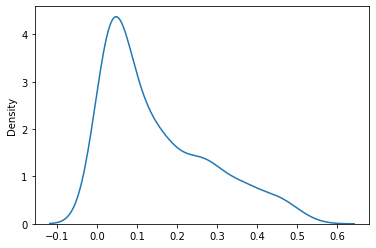

In [ ]:
sns.distplot(drop_df.pred.values, hist=False)

In [ ]:
tar_mean, tar_std = 0.25, 0.3
cnn_preds_selected_trans=tar_mean+(cnn_preds_selected - cnn_preds_selected.mean())*tar_std/cnn_preds_selected.std()
cnn_preds_selected_trans[cnn_preds_selected_trans>1] = 1.0
cnn_preds_selected_trans[cnn_preds_selected_trans<0] = 0

In [ ]:
cnn_preds_selected_trans[cnn_preds_selected_trans>0.9]

array([1.        , 0.948056  , 0.9554069 , 0.95716125, 0.9312874 ,
       0.9952799 , 1.        , 1.        , 0.91591626, 0.9309859 ,
       0.9265979 , 0.9587142 , 0.936702  , 0.98707193, 1.        ,
       0.9117073 , 0.9012897 , 1.        , 0.9242876 , 0.97376096],
      dtype=float32)

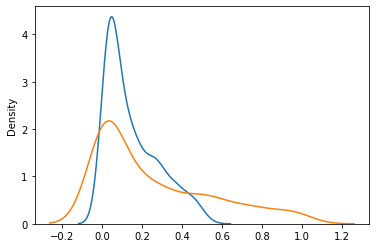

In [ ]:
sns.distplot(cnn_preds_selected, hist=False)
sns.distplot(cnn_preds_selected_trans, hist=False)

In [ ]:
sofa_df = pd.read_csv('SOFA_df.csv')
sofa_df['sofa_med'] = sofa_df.groupby('pid')['sofa_score'].transform(np.median)
sofa_df = sofa_df.drop_duplicates('pid').reset_index(drop=True)

FileNotFoundError: ignored

In [ ]:
test_df.loc[test_df.drop_duplicates('pid').index, 'pred'] = cnn_preds_selected_trans
drop_df = test_df.drop_duplicates('pid')
drop_df = drop_df.sort_values('pid').reset_index(drop=True)
sofa_df = sofa_df.sort_values('pid').reset_index(drop=True)
drop_df['sofa'] = sofa_df['sofa_med']

In [ ]:
drop_df.labels.value_counts()

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr1, tpr1, threshold1 = metrics.roc_curve(drop_df.labels, drop_df.pred)
roc_auc1 = metrics.auc(fpr1, tpr1)

fpr2, tpr2, threshold2 = metrics.roc_curve(drop_df.labels, drop_df.sofa)
roc_auc2 = metrics.auc(fpr2, tpr2)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.4f' % roc_auc1)
plt.plot(fpr2, tpr2, 'r', label = 'AUC = %0.4f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
for i in range(len(fpr2)):
    print(i, threshold2[i], round(tpr2[i], 4))

In [ ]:
9.0, 0.2308
0.7842227

In [ ]:
for i in range(len(fpr1)):
    print(i, threshold1[i], round(tpr1[i], 4))

In [ ]:
threshold1[fpr1<=0.0086 ]

In [ ]:
threshold2[fpr2<=0.01 ]

In [ ]:
sofa_cut = 9
cut =threshold1[8]

In [ ]:
drop_df.query('sofa<@sofa_cut and pred >= @cut and labels==1')[['pid', 'pred', 'sofa',  'ICUType_1.0', 'ICUType_2.0', 'ICUType_3.0', 'ICUType_4.0']]

존슨: 133636.0

In [ ]:
drop_df.query('sofa>=6')

In [ ]:
drop_df.to_csv('result.csv', index=False)

동일 특이도(0.9914) 기준: SOFA 11점이상, DMRS(Deep Mortality Risk Score) 기준 0.8144 이상.
민감도 SOFA: 0.0576, DMRS: 0.0961

동일 민감도( 0.2308) 기준 SOFA 9점이상, DMRS 0.7842 이상


In [ ]:
9.0, 0.2308
0.7842227

In [ ]:
fpr2[4], threshold2[4], tpr2[4]

In [ ]:
fpr1[6], threshold1[6], tpr1[6]

In [ ]:
fpr2[6], threshold2[6], tpr2[6]

In [ ]:
fpr1[8], threshold1[8], tpr1[8]

In [ ]:
drop_df.query('sofa>=@threshold2[6]').shape

In [ ]:
drop_df.query('pred>=@threshold1[8]').shape

In [ ]:
0.2308*52

In [ ]:
precision_sofa = 12/29
precision_dmrs = 12/17

In [ ]:
threshold1[8]

In [ ]:
17/29

In [ ]:
precision_sofa, precision_dmrs